<a href="https://colab.research.google.com/github/tamgerine/Math-152/blob/main/Group_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gauss's Circle Conjecture
### Walruses: Tamara, Iris, Jacob, Jake

Within this report, we explored the correspondence between the area of a circle and the number of lattice points it contains, as well as how the process for finding lattice points of a circle can translate into finding the lattice points of a similarly rounded shape, such as an ellipse. To begin exploring these relationships, we first had to come up with an algorithm to check each point contained within a given circle and a function that would only collect the lattice points. 

#Problem 1

# Method 1
The first solution we came up with was to brute force check all combinations of (x,y) within -R<x<R and -R<y<R. The problem with this method is that it is:

 1) very slow 

 2) checks a square which has a lot of points that will not be in our circle

 But it did technically work

In [ ]:
def lattice_points (R):
  latt = 0
  for x in range((-1)*R, R + 1):
    for y in range((-1)*R, R + 1):
      if (x**2 + y**2) <= R**2:
        latt += 1
  return latt


lattice_points(50)


7845

#Trying to Optimize
When trying to optimize the code, there were a few different routes that we came up with that are explained below

#Method 2
Since the circle's intersection with the lattice points should happen in all four quadrants, we figured out we could make the code more efficent by only computng the lattice points for a single quadrant, then quadrupling it.


In [ ]:
import numpy
def lattice_points_quad(R):
  points = R #The lattice points contained on the axes
  q_points = 0 #A variable to store the number of lattice points contained in a single quadrant
  for x in range(1, R+1): #Looping through x coordinates for a single quadrant
    for y in range(1, R+1): #Looping through y coordinates for a single quadrant
      #print("x: " + str(x) + ", y: " + str(y))
      if (x**2) + (y**2) < (R**2): #Checking if point is in circle
        #print("True")
        q_points += 1
      #else:
        #print("False")
  points += q_points #Adding in the points for a single quadrant
  points = points * 4 #Multplying for all quadrants
  points += 1 #For the origin

  return points

print(lattice_points_quad(3))


  

29


#Method 3
The goal is to try to only find the outermost ring of lattice points, after doing so we can know how many lattice points inside the ring exist. This ended up as our most optimized solution, and extremely quick up to 1,000,000 radius lengths


In [ ]:
import math
def outer_ring(R):
  outer_lattice = 0
  y=math.floor(R)

  radius_squared = R**2
  #this for loop iterates through all of the integers on the x axis in the first quadrant
  #i start checking at the coordinate (0,R) and then move towards the right
  for x in range(math.floor(R+1)):
    #i am checking here to see if the point im at is outside the circle, if so then y is dectremented by 1
    #print(y**2+x**2)
    while (y**2 + x**2)>radius_squared: 
      y=y-1
    #once the value is inside or on the circle 4y is added because there are 4 quadrants
    if y**2 + x**2 <= radius_squared:
      outer_lattice= outer_lattice + (4*y)
    #the only lattice point that is not caught by this algorithm is the rightmost point on the x axis so we add it back here
    if y == 0:
      outer_lattice = outer_lattice + 1 
  return outer_lattice

outer_ring(1000000)

3141592649625

#Method 4
The goal of this method was to run the standard brute force method but count lattice points in columns and optimize by changing the max y-value based on the y-value from the previous column 
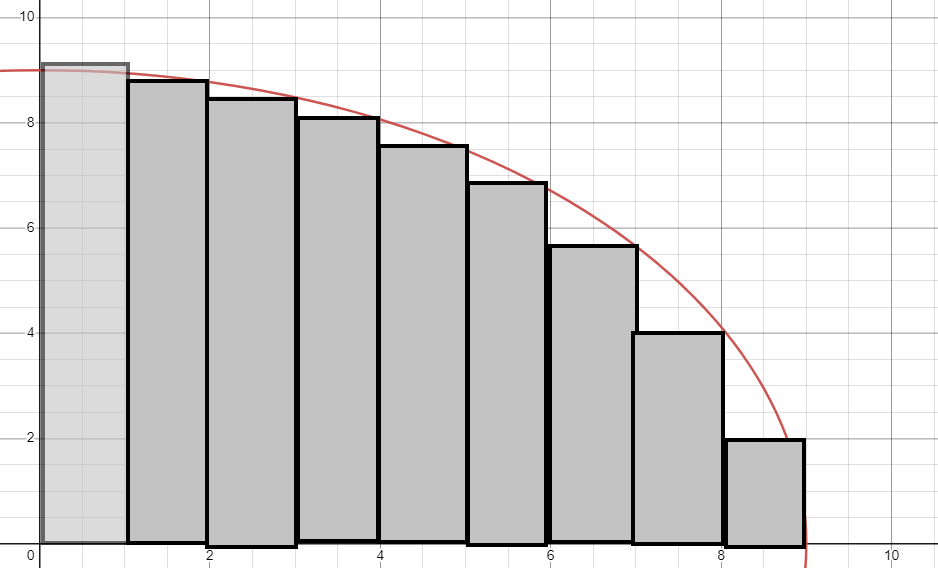

The idea was that each column would get tested for a bigger and bigger y-value until it was outside the circle. That failure point would become new maximum y-value to avoid cycling through all the points that exist between (0,0) and (R,R) but are outside our circle

In [ ]:
import math
def latt_point(r):
  r=0
  t=0
  y=0
  L=0
  int_L=0
  x=0
  z=r
  while x<r:
   for x in list(range(0,r+1,1)):
    for y in list(range(0,z+1,1)):
      L=L+math.sqrt((x**2)+(y**2))
      if L<=r:
        t=t+1
      else: 
        y=y+1
  return t

# Problem 2

To calculate the "error," we measured the area of the circle and then found the difference between the area and the number of lattice points. To analyze this data, we created a graph that tracked the size of the radius as it grew along the x-axis versus the error at each incrementally increasing value for the radius. 

In [ ]:
def error(R):
  area = math.pi * (R**2)
  lattice = outer_ring(R)
  error = area - lattice
  print("radius {0:0.1f} area {1:f} lattice {2:d} error {3:f}".format(R, area, lattice, error))
  return error

for i in range(1,100,1):
  error(i)

radius 1.0 area 3.141593 lattice 5 error -1.858407
radius 2.0 area 12.566371 lattice 13 error -0.433629
radius 3.0 area 28.274334 lattice 29 error -0.725666
radius 4.0 area 50.265482 lattice 49 error 1.265482
radius 5.0 area 78.539816 lattice 81 error -2.460184
radius 6.0 area 113.097336 lattice 113 error 0.097336
radius 7.0 area 153.938040 lattice 149 error 4.938040
radius 8.0 area 201.061930 lattice 197 error 4.061930
radius 9.0 area 254.469005 lattice 253 error 1.469005
radius 10.0 area 314.159265 lattice 317 error -2.840735
radius 11.0 area 380.132711 lattice 377 error 3.132711
radius 12.0 area 452.389342 lattice 441 error 11.389342
radius 13.0 area 530.929158 lattice 529 error 1.929158
radius 14.0 area 615.752160 lattice 613 error 2.752160
radius 15.0 area 706.858347 lattice 709 error -2.141653
radius 16.0 area 804.247719 lattice 797 error 7.247719
radius 17.0 area 907.920277 lattice 901 error 6.920277
radius 18.0 area 1017.876020 lattice 1009 error 8.876020
radius 19.0 area 1134.

radius [1, 2, 3, 4, 5]
error [1.8584073464102069, 0.43362938564082754, 0.725666117691862, 1.2654824574366899, 2.4601836602551685]


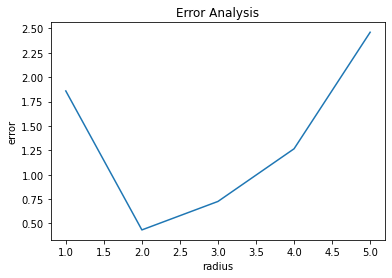

radius [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
error [1.8584073464102069, 0.43362938564082754, 0.725666117691862, 1.2654824574366899, 2.4601836602551685, 0.09733552923255218, 4.938040025899852, 4.061929829746759, 1.4690049407732317, 2.840734641020674, 3.132711084364985, 11.389342116930209, 1.9291584566750544, 2.752160103599408, 2.1416529422965596, 7.247719318987038, 6.9202768874502, 8.876019763092927, 5.114947945915219, 0.36293856408269676, 12.442360233098725, 3.530844337459939, 8.90251374900049, 16.557368467720835, 2.4954084936207437]


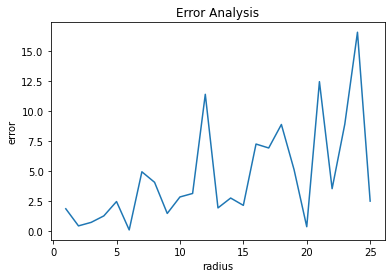

radius [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 

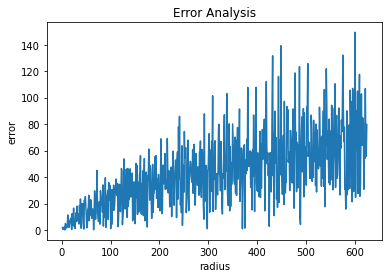

In [ ]:
def error(R):
  #from https://www.geeksforgeeks.org/graph-plotting-in-python-set-1/
  import matplotlib.pyplot as plt
  x=[]
  y=[]
  for i in range(1,R+1):
    area = math.pi * (i**2)
    x.append(i)
    lattice = outer_ring(i)
    error = abs(area - lattice)
    y.append(error)
  
  plt.xlabel('radius')
  plt.ylabel('error')
  plt.title('Error Analysis')
  
  # function to show the plot
  print("radius",x)
  print("error",y)
  plt.plot(x,y)
  plt.show()



error(5)
error(25)
error(625)





**Error** **Analysis**

I don't really see a defined pattern in how the error changes as the radius increases. It's a pretty irregular graph other than the fact that the error is  constantly varying between being very large and very small.

# Problem 3

The equation for an ellipse is $\frac{x^2}{a^2}+\frac{y^2}{b^2}=1$ where the width of the ellipse is $2a$ and the height is $2b$. Using this formula, we altered the code for calculating lattice points of a circle into a function that would calculate the lattice points of an ellipse. 


In [ ]:
import math
def ellipse(a,b):
  outer_lattice = 0
  y=math.floor(b)
  x=math.floor(a)
  if x==y: #height and width are same implies the ellipse is a circle so we can use function for elipse lattice points
    print(outer_ring(y))
  else:
    radius_squared=a**2*b**2
  #this for loop iterates through all of the integers on the x axis in the first quadrant
  #i start checking at the coordinate (0,R) and then move towards the right

    for x in range(math.floor(a+1)):
    #i am checking here to see if the point im at is outside the elipse, if so then y is dectremented by 1
    #print(y**2+x**2)
      while (a**2*y**2 + b**2*x**2)>radius_squared:  
        y=y-1
    #once the value is inside or on the elipse 4y is added because there are 4 quadrants
      if (a**2*y**2 + b**2*x**2)<=radius_squared:
        outer_lattice= outer_lattice + (4*y)
    #the only lattice point that is not caught by this algorithm is the rightmost point on the x axis so we add it back here
      if y == 0 or x==0:
        outer_lattice = outer_lattice + 1 
    return outer_lattice

ellipse(3,3)

29


**Our Findings** 

The main difference between the circle and the ellipse in calculating lattice points is that the circle has one radius while the ellipse has a height and a width, which makes it a circle when those two elements are equivalent. 

Since the only differences between an ellipse and a circle is that width and height are not the same and a small change to the formula, most of the code was able to be reused after making the adjustments to take in two variables instead of one, and changing the formula